In [ ]:
!sudo apt-get install openjdk-8-jdk-headless -qq > /dev/null

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [ ]:
ls

sample_data/  spark-3.2.0-bin-hadoop3.2/  spark-3.2.0-bin-hadoop3.2.tgz


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls /content/drive/MyDrive/marketing_data/

 City_Master.csv                     Customer_social_economic_data_p1.csv
'Customer_and_bank details_p1.csv'   Region_code_master.csv
 Customer_campaign_details_p1.csv    State_Master.csv
 Customer_Postal_Code_details.csv    transformed_files/
 Customer_Response_data_p1.csv


In [ ]:
!pip install findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 47.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=f644411b0e38b51d1a8d7992cbb4473ced00c26dda4df9dea417c2aed5783048
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
import pyspark
import numpy as np

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


Py4JError: ignored

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

Py4JError: ignored

In [ ]:
spark

NameError: ignored

In [ ]:
spark.sql("show tables;").show() #HIVE query

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
+---------+---------+-----------+



In [ ]:
from pyspark.sql import Row
from pyspark.sql.types import *

bankdf_schema = StructType([
    StructField("Customer_id", IntegerType(), False),
    StructField("age", IntegerType(), True),
    StructField("job", StringType(), True),
    StructField("marital", StringType(), True),
    StructField("education", StringType(), True),
    StructField("default", StringType(), True),
    StructField("housing", StringType(), True),
    StructField("loan", StringType(), True)])

campaigndf_schema = StructType([
    StructField("Customer_id", IntegerType(), False),
    StructField("contact", StringType(), True),
    StructField("month", StringType(), True),#check
    StructField("day_of_week", StringType(), True),
    StructField("duration", IntegerType(), True),
    StructField("campaign", IntegerType(), True),
    StructField("pdays", IntegerType(), True),
    StructField("previous", IntegerType(), True),
    StructField("poutcome", StringType(), True)])

economicdf_schema = StructType([
    StructField("Customer_id", IntegerType(), False),
    StructField("emp_var_rate", FloatType(), False),
    StructField("cons_price_idx", FloatType(), False),
    StructField("cons_conf_idx", FloatType(), False),
    StructField("euribor3m", FloatType(), False),
    StructField("nr_employed", FloatType(), False)])

responsedf_schema = StructType([
    StructField("Customer_id", IntegerType(), False),
    StructField("y", StringType(), True)])

In [ ]:
bankdf = spark.read.option("delimiter", ",").option("header", True).schema(bankdf_schema).csv("/content/drive/MyDrive/marketing_data/Customer_and_bank details_p1.csv")
campaigndf = spark.read.option("delimiter", ",").option("header", True).schema(campaigndf_schema).csv("/content/drive/MyDrive/marketing_data/Customer_campaign_details_p1.csv")
economicdf = spark.read.option("delimiter", ",").option("header", True).schema(economicdf_schema).csv("/content/drive/MyDrive/marketing_data/Customer_social_economic_data_p1.csv")
responsedf = spark.read.option("delimiter", ",").option("header", True).schema(responsedf_schema).csv("/content/drive/MyDrive/marketing_data/Customer_Response_data_p1.csv")


In [ ]:
bankdf.show()

+-----------+---+-----------+--------+-------------------+-------+-------+----+
|Customer_id|age|        job| marital|          education|default|housing|loan|
+-----------+---+-----------+--------+-------------------+-------+-------+----+
|          1| 56|   services| married|        high.school|     no|     no| yes|
|          2| 45|   services| married|           basic.9y|unknown|     no|  no|
|          3| 59|     admin.| married|professional.course|     no|     no|  no|
|          4| 41|blue-collar| married|            unknown|unknown|     no|  no|
|          5| 24| technician|  single|professional.course|     no|    yes|  no|
|          6| 25|   services|  single|        high.school|     no|    yes|  no|
|          7| 41|blue-collar| married|            unknown|unknown|     no|  no|
|          8| 25|   services|  single|        high.school|     no|    yes|  no|
|          9| 29|blue-collar|  single|        high.school|     no|     no| yes|
|         10| 57|  housemaid|divorced|  

In [ ]:
campaigndf.show()

+-----------+---------+-----+-----------+--------+--------+-----+--------+-----------+
|Customer_id|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|
+-----------+---------+-----+-----------+--------+--------+-----+--------+-----------+
|          1|telephone|  may|        mon|     307|       1|  999|       0|nonexistent|
|          2|telephone|  may|        mon|     198|       1|  999|       0|nonexistent|
|          3|telephone|  may|        mon|     139|       1|  999|       0|nonexistent|
|          4|telephone|  may|        mon|     217|       1|  999|       0|nonexistent|
|          5|telephone|  may|        mon|     380|       1|  999|       0|nonexistent|
|          6|telephone|  may|        mon|      50|       1|  999|       0|nonexistent|
|          7|telephone|  may|        mon|      55|       1|  999|       0|nonexistent|
|          8|telephone|  may|        mon|     222|       1|  999|       0|nonexistent|
|          9|telephone|  may|        mon|  

In [ ]:
economicdf.show()

+-----------+------------+--------------+-------------+---------+-----------+
|Customer_id|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|
+-----------+------------+--------------+-------------+---------+-----------+
|          1|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|          2|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|          3|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|          4|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|          5|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|          6|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|          7|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|          8|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|          9|         1.1|        93.994|        -36.4|    4.857|     5191.0|
|         10|         1.1|        93.994|        -36.4|    4.857

In [ ]:
responsedf.show()

+-----------+---+
|Customer_id|  y|
+-----------+---+
|          1| no|
|          2| no|
|          3| no|
|          4| no|
|          5| no|
|          6| no|
|          7| no|
|          8| no|
|          9| no|
|         10| no|
|         11| no|
|         12| no|
|         13| no|
|         14| no|
|         15| no|
|         16| no|
|         17| no|
|         18| no|
|         19| no|
|         20| no|
+-----------+---+
only showing top 20 rows



In [ ]:
df = bankdf.join(campaigndf,['Customer_id']).where(bankdf['Customer_id'] == campaigndf['Customer_id']).join(economicdf,['Customer_id']).where(bankdf['Customer_id'] == economicdf['Customer_id']).join(responsedf,['Customer_id']).where(bankdf['Customer_id'] == responsedf['Customer_id'])
df.show()

+-----------+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|Customer_id|age|        job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+-----------+---+-----------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|          1| 56|   services| married|        high.school|     no|     no| yes|telephone|  may|        mon|     307|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
|          2| 45|   services| married|           basic.9y|unknown|     no|  no|telephone|  may|        mon|     198|

In [ ]:
df.printSchema()

root
 |-- Customer_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: float (nullable = true)
 |-- cons_price_idx: float (nullable = true)
 |-- cons_conf_idx: float (nullable = true)
 |-- euribor3m: float (nullable = true)
 |-- nr_employed: float (nullable = true)
 |-- y: string (nullable = true)



In [ ]:
df.count()

37084

In [ ]:
df.describe().show()

+-------+------------------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-----+
|summary|       Customer_id|               age|    job| marital|education|default|housing| loan|  contact|month|day_of_week|          duration|          campaign|             pdays|           previous|poutcome|       emp_var_rate|    cons_price_idx|     cons_conf_idx|         euribor3m|      nr_employed|    y|
+-------+------------------+------------------+-------+--------+---------+-------+-------+-----+---------+-----+-----------+------------------+------------------+------------------+-------------------+--------+-------------------+------------------+------------------+------------------+-----------------+-----+
|  count|             37084|             37084|  37084|   37084|

 **Checking Null/None/nan type/missing values if any**

In [ ]:
from pyspark.sql.functions import col,isnan,when,count
df.select([count(when(col(c).contains('None') | col(c).contains('NULL') | (col(c) == '' ) | col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns]).show()

+-----------+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|Customer_id|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+-----------+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|          0|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+-----------+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+



**Dropping duplcate values if any**

In [ ]:
df = df.drop_duplicates()
df.count()

37084

In [ ]:
df.createOrReplaceTempView("marketing")
query1 = 'select * from marketing'
spark.sql(query1).show()

+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|Customer_id|age|         job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|        372| 47|      admin.| married|        high.school|unknown|     no|  no|telephone|  may|        tue|     505|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
|        395| 32| blue-collar|divorced|           basic.9y|unknown|     no|  no|telephone|  may|        tue|    

**Removing column outliers that were analysed in previous checkpoints** 

In [ ]:
d = {}
column_names=['age','campaign','duration']
for col in column_names:
      d[col] = df.approxQuantile(col,[0.01,0.99],0.25)

In [ ]:
import pyspark.sql.functions as F
for col in column_names:
    df_new = df.withColumn(col,F.log(F.when(df[col] < d[col][0],d[col][0]).when(df[col] > d[col][1], d[col][1]).otherwise(df[col] ) +1).alias(col))
    print(col+" => column transformation done")

age => column transformation done
campaign => column transformation done
duration => column transformation done


In [ ]:
df_new.show()

+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|Customer_id|age|         job| marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|        372| 47|      admin.| married|        high.school|unknown|     no|  no|telephone|  may|        tue| 6.226536669287466|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
|        395| 32| blue-collar|divorced|           basic.9y|unknown|     

**Doing label encodings for categorical variables**

Here in pdays, 999 means that the customer was not previously contacted so instead of 999 we can assign it to 0

In [ ]:
df_new =df_new.withColumn("pdays",when(df_new["pdays"] == 999,0).otherwise(df_new["pdays"]))
#df_new = df_new.na.replace(999,0)
df_new.show()

+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|Customer_id|age|         job| marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|        372| 47|      admin.| married|        high.school|unknown|     no|  no|telephone|  may|        tue| 6.226536669287466|       1|    0|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
|        395| 32| blue-collar|divorced|           basic.9y|unknown|     

In [ ]:
from itertools import chain
from pyspark.sql.functions import create_map, lit
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}

mapping = create_map([lit(x) for x in chain(*month_dict.items())])

df2 = df_new.withColumn('month', mapping[df_new['month']])
df2.show(30)

+-----------+---+------------+--------+-------------------+-------+-------+-------+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|Customer_id|age|         job| marital|          education|default|housing|   loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+-----------+---+------------+--------+-------------------+-------+-------+-------+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|        372| 47|      admin.| married|        high.school|unknown|     no|     no|telephone|    5|        tue| 6.226536669287466|       1|    0|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
|        395| 32| blue-collar|divorced|           basic.9y|u

In [ ]:
from pyspark.sql.functions import *
max_val = df2.agg({'month': 'max'}).first()[0]
res = df2.select("Customer_id","month",lit(sin((df2["month"]*6.28)/max_val)).alias("month_sin"))
res2 = res.select("Customer_id","month","month_sin",lit(cos((res["month"]*6.28)/max_val)).alias("month_cos"))
res3 = res2.select("Customer_id","month_sin","month_cos")
res3.show()

+-----------+------------------+-------------------+
|Customer_id|         month_sin|          month_cos|
+-----------+------------------+-------------------+
|        372|0.5011489580136382|-0.8653610355694579|
|        395|0.5011489580136382|-0.8653610355694579|
|        489|0.5011489580136382|-0.8653610355694579|
|        665|0.5011489580136382|-0.8653610355694579|
|        741|0.5011489580136382|-0.8653610355694579|
|        794|0.5011489580136382|-0.8653610355694579|
|        882|0.5011489580136382|-0.8653610355694579|
|        985|0.5011489580136382|-0.8653610355694579|
|       1160|0.5011489580136382|-0.8653610355694579|
|       1186|0.5011489580136382|-0.8653610355694579|
|       1531|0.5011489580136382|-0.8653610355694579|
|       1613|0.5011489580136382|-0.8653610355694579|
|       1714|0.5011489580136382|-0.8653610355694579|
|       1887|0.5011489580136382|-0.8653610355694579|
|       2083|0.5011489580136382|-0.8653610355694579|
|       2184|0.5011489580136382|-0.86536103556

In [ ]:
df2 = df2.join(res3,['Customer_id']).where(df2['Customer_id'] == res3['Customer_id'])
df2.show()

+-----------+---+------------+--------+-----------------+-------+-------+-------+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+--------------------+--------------------+
|Customer_id|age|         job| marital|        education|default|housing|   loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|           month_sin|           month_cos|
+-----------+---+------------+--------+-----------------+-------+-------+-------+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+--------------------+--------------------+
|       4101| 34|  management|  single|         basic.9y|     no|     no|     no|telephone|    5|        tue| 5.707110264748875|       3|    0|       0|nonexistent|         1.

In [ ]:
day_dict={'thu':4,'mon':1,'wed':3,'tue':2,'fri':5}

mapping2 = create_map([lit(x) for x in chain(*day_dict.items())])

df3 = df2.withColumn('day_of_week', mapping2[df2['day_of_week']])
df3.show(30)

+-----------+---+------------+--------+-------------------+-------+-------+-------+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+--------------------+--------------------+
|Customer_id|age|         job| marital|          education|default|housing|   loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|           month_sin|           month_cos|
+-----------+---+------------+--------+-------------------+-------+-------+-------+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+--------------------+--------------------+
|       4101| 34|  management|  single|           basic.9y|     no|     no|     no|telephone|    5|          2| 5.707110264748875|       3|    0|       0|nonexistent|   

In [ ]:
df3.printSchema()

root
 |-- Customer_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: float (nullable = true)
 |-- cons_price_idx: float (nullable = true)
 |-- cons_conf_idx: float (nullable = true)
 |-- euribor3m: float (nullable = true)
 |-- nr_employed: float (nullable = true)
 |-- y: string (nullable = true)
 |-- month_sin: double (nullable = true)
 |-- month_cos: double (nullable = true)



In [ ]:
max_val2 = df3.agg({'day_of_week': 'max'}).first()[0]
res4 = df3.select("Customer_id","day_of_week",lit(sin((df3["day_of_week"]*6.28)/max_val)).alias("day_of_week_sin"))
res5 = res4.select("Customer_id","day_of_week","day_of_week_sin",lit(cos((res4["day_of_week"]*6.28)/max_val2)).alias("day_of_week_cos"))
res6 = res5.select("Customer_id","day_of_week_sin","day_of_week_cos")
res6.show()

+-----------+------------------+-------------------+
|Customer_id|   day_of_week_sin|    day_of_week_cos|
+-----------+------------------+-------------------+
|       4101|0.8657598394923444|  -0.80826742726931|
|      34239|0.9999996829318346|-0.8101388821239993|
|       5300|0.4997701026431024| 0.3096228130570242|
|       7754|0.9999996829318346|-0.8101388821239993|
|       7833|0.9999996829318346|-0.8101388821239993|
|      22346|0.8657598394923444|  -0.80826742726931|
|      29285|0.5011489580136382| 0.9999949269133752|
|      32460|0.8657598394923444|  -0.80826742726931|
|      30970|0.8665558000562658| 0.3065924679690989|
|       7880|0.9999996829318346|-0.8101388821239993|
|      11033|0.8665558000562658| 0.3065924679690989|
|      22521|0.8657598394923444|  -0.80826742726931|
|      29054|0.5011489580136382| 0.9999949269133752|
|      28664|0.8665558000562658| 0.3065924679690989|
|      13832|0.5011489580136382| 0.9999949269133752|
|      26706|0.4997701026431024| 0.30962281305

In [ ]:
df3 = df3.join(res6,['Customer_id']).where(df3['Customer_id'] == res6['Customer_id'])
df3.show()

+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+
|Customer_id|age|         job| marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|
+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+
|          1| 56|    services| married|        high.school|     no|     n

In [ ]:
df3.printSchema()

root
 |-- Customer_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: float (nullable = true)
 |-- cons_price_idx: float (nullable = true)
 |-- cons_conf_idx: float (nullable = true)
 |-- euribor3m: float (nullable = true)
 |-- nr_employed: float (nullable = true)
 |-- y: string (nullable = true)
 |-- month_sin: double (nullable = true)
 |-- month_cos: double (nullable = true)
 |-- day_of_week_sin: double (nullab

In [ ]:
mapping_dict={'yes':1,'no':0,'unknown':-1}
mapping3 = create_map([lit(x) for x in chain(*mapping_dict.items())])

df3 = df3.withColumn('housing', mapping3[df3['housing']])
df3 = df3.withColumn('default', mapping3[df3['default']])
df4 = df3.withColumn('loan', mapping3[df3['loan']])
df4.show()

+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+
|Customer_id|age|         job| marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|
+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+
|          1| 56|    services| married|        high.school|      0|      

In [ ]:
mapping_dict2={'no':0,'yes':1}
mapping4 = create_map([lit(x) for x in chain(*mapping_dict2.items())])

df5 = df4.withColumn('y', mapping4[df4['y']])
df5.show()

+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+
|Customer_id|age|         job| marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|
+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+
|          1| 56|    services| married|        high.school|      0|      

**Label encoding according to the mean in regards to response 'y'**

In [ ]:
df5.groupBy('marital').mean('y').show()

+--------+-------------------+
| marital|             avg(y)|
+--------+-------------------+
| unknown|0.16666666666666666|
|divorced|0.10349006301502665|
| married|0.10196183104230615|
|  single|0.14192370519842415|
+--------+-------------------+



In [ ]:
marital_dict={'divorced': 1, 'married': 0, 'single': 2, 'unknown': 3}
mapping5 = create_map([lit(x) for x in chain(*marital_dict.items())])

df6 = df5.withColumn('marital', mapping5[df5['marital']])
df6.show()

+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+
|Customer_id|age|         job|marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|
+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+
|          1| 56|    services|      0|        high.school|      0|      0|  

**One hot encoding contact,poutcome but first we need to use stringIndexer to convert it to numeric then use OneHotEncoder**

In [ ]:
from pyspark.ml.feature import StringIndexer
dummyIndexer = StringIndexer(inputCol="contact", outputCol="dummy_contact_index")
df7 = dummyIndexer.fit(df6).transform(df6)
#df7 = df7.drop('contact')
df7.show()

+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+
|Customer_id|age|         job|marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|
+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+
|          1| 56

In [ ]:
dummyIndexer2 = StringIndexer(inputCol="poutcome", outputCol="dummy_poutcome_index")
df8 = dummyIndexer2.fit(df7).transform(df7)
#df8 = df8.drop('poutcome')
df8.show()

+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+--------------------+
|Customer_id|age|         job|marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|dummy_poutcome_index|
+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+--------------

In [ ]:
df8.printSchema()

root
 |-- Customer_id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- default: integer (nullable = true)
 |-- housing: integer (nullable = true)
 |-- loan: integer (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: float (nullable = true)
 |-- cons_price_idx: float (nullable = true)
 |-- cons_conf_idx: float (nullable = true)
 |-- euribor3m: float (nullable = true)
 |-- nr_employed: float (nullable = true)
 |-- y: integer (nullable = true)
 |-- month_sin: double (nullable = true)
 |-- month_cos: double (nullable = true)
 |-- day_of_week_sin: double (n

In [ ]:
from pyspark.ml.feature import OneHotEncoder

onehotencoder_contact_vector = OneHotEncoder(inputCol="dummy_contact_index", outputCol="contact_vec")
onehotencoder_contact_vector.setDropLast(False)
df9 = onehotencoder_contact_vector.fit(df8).transform(df8)
#df9 = df9.drop('dummy_contact_index')
df9.show(30)

+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+--------------------+-------------+
|Customer_id|age|         job|marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|dummy_poutcome_index|  contact_vec|
+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+-----

In [ ]:
onehotencoder_poutcome_vector = OneHotEncoder(inputCol="dummy_poutcome_index", outputCol="poutcome_vec")
onehotencoder_poutcome_vector.setDropLast(False)
df10 = onehotencoder_poutcome_vector.fit(df9).transform(df9)
#df10 = df10.drop('dummy_poutcome_index')
df10.show()

+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+--------------------+-------------+-------------+
|Customer_id|age|         job|marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|dummy_poutcome_index|  contact_vec| poutcome_vec|
+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+----------------

In [ ]:
contact_colIdx = df10.select("contact","dummy_contact_index").distinct().rdd.collectAsMap()
poutcome_colIdx = df10.select("poutcome","dummy_poutcome_index").distinct().rdd.collectAsMap()
print("contact_mapping : ",contact_colIdx)
print("poutcome_mapping : ",poutcome_colIdx)

contact_mapping :  {'cellular': 0.0, 'telephone': 1.0}
poutcome_mapping :  {'failure': 1.0, 'success': 2.0, 'nonexistent': 0.0}


In [ ]:
contact_colIdx =  sorted((value, "dummy_" + key) for (key, value) in contact_colIdx.items())
poutcome_colIdx =  sorted((value, "dummy_" + key) for (key, value) in poutcome_colIdx.items())
print("contact mapping : ",contact_colIdx)
print("poutcome mapping : ",poutcome_colIdx)

contact mapping :  [(0.0, 'dummy_cellular'), (1.0, 'dummy_telephone')]
poutcome mapping :  [(0.0, 'dummy_nonexistent'), (1.0, 'dummy_failure'), (2.0, 'dummy_success')]


In [ ]:
contact_newCols = list(map(lambda x: x[1], contact_colIdx))
actualCol = df10.columns
allColNames = actualCol + contact_newCols
print(allColNames)

['Customer_id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos', 'dummy_contact_index', 'dummy_poutcome_index', 'contact_vec', 'poutcome_vec', 'dummy_cellular', 'dummy_telephone']


In [ ]:
def extract(row):
  return tuple(map(lambda x: row[x], row.__fields__)) + tuple(row.contact_vec.toArray().tolist())

df11 = df10.rdd.map(extract).toDF(allColNames)

In [ ]:
poutcome_newCols = list(map(lambda x: x[1], poutcome_colIdx))
actualCol = df11.columns
allColNames = actualCol + poutcome_newCols
def extract2(row):
  return tuple(map(lambda x: row[x], row.__fields__)) + tuple(row.poutcome_vec.toArray().tolist())

df12 = df11.rdd.map(extract2).toDF(allColNames)

In [ ]:
df12.show()

+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+--------------------+-------------+-------------+--------------+---------------+-----------------+-------------+-------------+
|Customer_id|age|         job|marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|dummy_poutcome_index|  contact_vec| poutcome_vec|dummy_cellular|dummy_telephone|dummy_nonexistent|dummy_failure|dummy_success|
+-----------+---+------------+-------+------------

In [ ]:
df12.printSchema()

root
 |-- Customer_id: long (nullable = true)
 |-- age: long (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: long (nullable = true)
 |-- education: string (nullable = true)
 |-- default: long (nullable = true)
 |-- housing: long (nullable = true)
 |-- loan: long (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: long (nullable = true)
 |-- day_of_week: long (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: long (nullable = true)
 |-- pdays: long (nullable = true)
 |-- previous: long (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: long (nullable = true)
 |-- month_sin: double (nullable = true)
 |-- month_cos: double (nullable = true)
 |-- day_of_week_sin: double (nullable = true)
 |-- day_of_wee

In [ ]:
from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace
df13 = df12.withColumn('education',when(df12.education.endswith('basic.4y'),regexp_replace(df12.education,'basic.4y','basic')).when(df12.education.endswith('basic.6y'),regexp_replace(df12.education,'basic.6y','basic')).when(df12.education.endswith('basic.9y'),regexp_replace(df12.education,'basic.9y','basic')).otherwise(df12.education))
df13.show()

+-----------+---+------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+--------------------+-------------+-------------+--------------+---------------+-----------------+-------------+-------------+
|Customer_id|age|         job|marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|dummy_poutcome_index|  contact_vec| poutcome_vec|dummy_cellular|dummy_telephone|dummy_nonexistent|dummy_failure|dummy_success|
+-----------+---+------------+-------+------------

In [ ]:
df14 = df13.withColumn('job',when(df13.job.endswith('admin.'),regexp_replace(df13.job,'admin.','management')).when(df13.job.endswith('housemaid'),regexp_replace(df13.job,'housemaid','blue-collar')).when(df13.job.endswith('entrepreneur'),regexp_replace(df13.job,'entrepreneur','self-employed')).otherwise(df13.job))
df14.show()

+-----------+---+-------------+-------+-------------------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+--------------------+-------------+-------------+--------------+---------------+-----------------+-------------+-------------+
|Customer_id|age|          job|marital|          education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|dummy_poutcome_index|  contact_vec| poutcome_vec|dummy_cellular|dummy_telephone|dummy_nonexistent|dummy_failure|dummy_success|
+-----------+---+-------------+-------+---------

In [ ]:
import pandas as pd

edu_df = df14.groupBy('education').sum('y').toPandas()
edu_list = edu_df['education'].tolist()
count_list = edu_df['sum(y)'].tolist()
education_dict = {edu_list[i]: count_list[i] for i in range(len(edu_list))}
print(education_dict)

{'high.school': 945, 'unknown': 231, 'professional.course': 541, 'university.degree': 1507, 'basic': 982, 'illiterate': 2}


In [ ]:
mapping6 = create_map([lit(x) for x in chain(*education_dict.items())])

df15 = df14.withColumn('education', mapping6[df14['education']])
df15.show()

+-----------+---+-------------+-------+---------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+--------------------+-------------+-------------+--------------+---------------+-----------------+-------------+-------------+
|Customer_id|age|          job|marital|education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|dummy_poutcome_index|  contact_vec| poutcome_vec|dummy_cellular|dummy_telephone|dummy_nonexistent|dummy_failure|dummy_success|
+-----------+---+-------------+-------+---------+-------+-------+---

In [ ]:
job_df = df15.groupBy('job').sum('y').toPandas()
job_list = job_df['job'].tolist()
count2_list = job_df['sum(y)'].tolist()
job_dict = {job_list[i]: count2_list[i] for i in range(len(job_list))}
print(job_dict)

{'management': 1538, 'retired': 395, 'unknown': 35, 'self-employed': 242, 'student': 240, 'blue-collar': 669, 'technician': 657, 'services': 298, 'unemployed': 134}


In [ ]:
mapping7 = create_map([lit(x) for x in chain(*job_dict.items())])

df16 = df15.withColumn('job', mapping7[df15['job']])
df16.show()

+-----------+---+----+-------+---------+-------+-------+----+---------+-----+-----------+------------------+--------+-----+--------+-----------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+-------------------+--------------------+-------------+-------------+--------------+---------------+-----------------+-------------+-------------+
|Customer_id|age| job|marital|education|default|housing|loan|  contact|month|day_of_week|          duration|campaign|pdays|previous|   poutcome|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_contact_index|dummy_poutcome_index|  contact_vec| poutcome_vec|dummy_cellular|dummy_telephone|dummy_nonexistent|dummy_failure|dummy_success|
+-----------+---+----+-------+---------+-------+-------+----+---------+-----+---------

In [ ]:
df16.printSchema()

root
 |-- Customer_id: long (nullable = true)
 |-- age: long (nullable = true)
 |-- job: integer (nullable = true)
 |-- marital: long (nullable = true)
 |-- education: integer (nullable = true)
 |-- default: long (nullable = true)
 |-- housing: long (nullable = true)
 |-- loan: long (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: long (nullable = true)
 |-- day_of_week: long (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: long (nullable = true)
 |-- pdays: long (nullable = true)
 |-- previous: long (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: long (nullable = true)
 |-- month_sin: double (nullable = true)
 |-- month_cos: double (nullable = true)
 |-- day_of_week_sin: double (nullable = true)
 |-- day_of_w

In [ ]:
finaldf = df16.drop('contact','month','day_of_week','poutcome','dummy_contact_index','dummy_poutcome_index','contact_vec','poutcome_vec','dummy_telephone','dummy_nonexistent')
finaldf.show()

+-----------+---+----+-------+---------+-------+-------+----+------------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+
|Customer_id|age| job|marital|education|default|housing|loan|          duration|campaign|pdays|previous|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_cellular|dummy_failure|dummy_success|
+-----------+---+----+-------+---------+-------+-------+----+------------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+
|          1| 56| 298|      0|      945|      0|      0|  

In [ ]:
finaldf.printSchema()

root
 |-- Customer_id: long (nullable = true)
 |-- age: long (nullable = true)
 |-- job: integer (nullable = true)
 |-- marital: long (nullable = true)
 |-- education: integer (nullable = true)
 |-- default: long (nullable = true)
 |-- housing: long (nullable = true)
 |-- loan: long (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: long (nullable = true)
 |-- pdays: long (nullable = true)
 |-- previous: long (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: long (nullable = true)
 |-- month_sin: double (nullable = true)
 |-- month_cos: double (nullable = true)
 |-- day_of_week_sin: double (nullable = true)
 |-- day_of_week_cos: double (nullable = true)
 |-- dummy_cellular: double (nullable = true)
 |-- dummy_failure: double (nullable = true)
 |-- dummy_success: double (nu

**Saving clean data as hive table and using hive query on that table**

In [ ]:
finaldf.createOrReplaceTempView("final_table")
spark.sql("select * from final_table").show()

+-----------+---+----+-------+---------+-------+-------+----+------------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+
|Customer_id|age| job|marital|education|default|housing|loan|          duration|campaign|pdays|previous|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_cellular|dummy_failure|dummy_success|
+-----------+---+----+-------+---------+-------+-------+----+------------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+
|          1| 56| 298|      0|      945|      0|      0|  

**Creating Hive table**

In [ ]:
spark.sql("create table if not exists campaign as select * from final_table")
spark.sql("show tables;").show()

+---------+-----------+-----------+
|namespace|  tableName|isTemporary|
+---------+-----------+-----------+
|  default|   campaign|      false|
|         |final_table|       true|
|         |  marketing|       true|
+---------+-----------+-----------+



In [ ]:
spark.sql("select * from marketing;").show()

+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|Customer_id|age|         job| marital|          education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+-----------+---+------------+--------+-------------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|        372| 47|      admin.| married|        high.school|unknown|     no|  no|telephone|  may|        tue|     505|       1|  999|       0|nonexistent|         1.1|        93.994|        -36.4|    4.857|     5191.0| no|
|        395| 32| blue-collar|divorced|           basic.9y|unknown|     no|  no|telephone|  may|        tue|    

In [ ]:
spark.sql("select * from final_table;").show()

+-----------+---+----+-------+---------+-------+-------+----+------------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+
|Customer_id|age| job|marital|education|default|housing|loan|          duration|campaign|pdays|previous|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_cellular|dummy_failure|dummy_success|
+-----------+---+----+-------+---------+-------+-------+----+------------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+
|          1| 56| 298|      0|      945|      0|      0|  

In [ ]:
spark.sql("select count(*) from final_table").show()

+--------+
|count(1)|
+--------+
|   37084|
+--------+



In [ ]:
spark.sql("describe final_table;").show(30)

+---------------+---------+-------+
|       col_name|data_type|comment|
+---------------+---------+-------+
|    Customer_id|   bigint|   null|
|            age|   bigint|   null|
|            job|      int|   null|
|        marital|   bigint|   null|
|      education|      int|   null|
|        default|   bigint|   null|
|        housing|   bigint|   null|
|           loan|   bigint|   null|
|       duration|   double|   null|
|       campaign|   bigint|   null|
|          pdays|   bigint|   null|
|       previous|   bigint|   null|
|   emp_var_rate|   double|   null|
| cons_price_idx|   double|   null|
|  cons_conf_idx|   double|   null|
|      euribor3m|   double|   null|
|    nr_employed|   double|   null|
|              y|   bigint|   null|
|      month_sin|   double|   null|
|      month_cos|   double|   null|
|day_of_week_sin|   double|   null|
|day_of_week_cos|   double|   null|
| dummy_cellular|   double|   null|
|  dummy_failure|   double|   null|
|  dummy_success|   double| 

**Writing to paraquet format**

In [ ]:
finaldf.write.parquet("/content/drive/MyDrive/marketing_data/transformed_files/marketing_campaign.parquet")

In [ ]:
ls /content/drive/MyDrive/marketing_data/transformed_files/

clean_marketing_campaign.csv/  marketing_campaign.parquet/  newdf.csv


**Reading from paraquet format to a spark dataframe**

In [ ]:
ls /content/drive/MyDrive/marketing_data/transformed_files/marketing_campaign.parquet/

part-00000-ad0169eb-bfec-4103-bb0c-d8514475faef-c000.snappy.parquet  _SUCCESS
part-00001-ad0169eb-bfec-4103-bb0c-d8514475faef-c000.snappy.parquet


In [ ]:
paraquet_marketing_df = spark.read.parquet("/content/drive/MyDrive/marketing_data/transformed_files/marketing_campaign.parquet")

In [ ]:
paraquet_marketing_df.show()

+-----------+---+----+-------+---------+-------+-------+----+------------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+
|Customer_id|age| job|marital|education|default|housing|loan|          duration|campaign|pdays|previous|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_cellular|dummy_failure|dummy_success|
+-----------+---+----+-------+---------+-------+-------+----+------------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+
|          2| 45| 298|      0|      982|     -1|      0|  

**Standardization using Standard Scaler**

In [ ]:
categorical_val=['job','marital', 'education', 'default', 'housing', 'loan',
       'day_of_week_cos','y', 'day_of_week_sin', 'month_sin','month_cos','dummy_telephone','dummy_nonexistent','dummy_success']
scale=[feature for feature in paraquet_marketing_df.columns if feature not in categorical_val]

from pyspark.ml.feature import VectorAssembler,StandardScaler
vector_assembler=VectorAssembler(inputCols=scale,outputCol="SS_features")
temp_data=vector_assembler.transform(paraquet_marketing_df)
temp_data.select("SS_features").show()

+--------------------+
|         SS_features|
+--------------------+
|[2.0,45.0,5.29330...|
|[4.0,41.0,5.38449...|
|[7.0,41.0,4.02535...|
|[8.0,25.0,5.40717...|
|[10.0,57.0,5.6835...|
|[11.0,35.0,4.9904...|
|[14.0,46.0,6.0890...|
|[18.0,55.0,5.8377...|
|[21.0,35.0,4.6051...|
|[23.0,54.0,5.5451...|
|[24.0,55.0,5.8944...|
|[25.0,46.0,5.8550...|
|[29.0,55.0,5.8200...|
|[30.0,34.0,5.9026...|
|[32.0,41.0,6.3595...|
|[33.0,56.0,4.9272...|
|[36.0,38.0,5.0814...|
|[38.0,44.0,5.2417...|
|[39.0,42.0,3.1354...|
|[42.0,35.0,5.8749...|
+--------------------+
only showing top 20 rows



In [ ]:
temp_data.show(10)

+-----------+---+---+-------+---------+-------+-------+----+-----------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+--------------------+
|Customer_id|age|job|marital|education|default|housing|loan|         duration|campaign|pdays|previous|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_cellular|dummy_failure|dummy_success|         SS_features|
+-----------+---+---+-------+---------+-------+-------+----+-----------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+--------------------+
|

In [ ]:
standard_scaler=StandardScaler(inputCol="SS_features",outputCol="scaled")
ss_df=standard_scaler.fit(temp_data).transform(temp_data)
ss_df.show(5)

+-----------+---+---+-------+---------+-------+-------+----+-----------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+--------------------+--------------------+
|Customer_id|age|job|marital|education|default|housing|loan|         duration|campaign|pdays|previous|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_cellular|dummy_failure|dummy_success|         SS_features|              scaled|
+-----------+---+---+-------+---------+-------+-------+----+-----------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+---------

In [ ]:
ss_df.select("scaled").show(5,truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|scaled                                                                                                                                                                                        |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.8682207474565471E-4,4.313251320483523,5.75877647315365,0.36093124509827934,0.0,0.0,0.7010848602364751,162.48075722958168,-7.8753020013240675,2.8010832902241463,71.90090712237155,0.0,0.0] |
|[3.7364414949130943E-4,3.9298512031072104,5.85798560902181,0.36093124509827934,0.0,0.0,0.7010848602364751,162.48075722958168,-7.8753020013240675,2.8010832902241463,71.90090712237155,0.0,0.0]|
|[6.538772616097915E-4,3.9298512031

**Splitting Train/Test Data**

In [ ]:
train,test=ss_df.randomSplit([0.7,0.3],seed=7)
print(f"Train set length:{train.count()} records")
print(f"Test set length:{test.count()} records")

Train set length:25951 records
Test set length:11133 records


In [ ]:
train.show(2)

+-----------+---+---+-------+---------+-------+-------+----+-----------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+-------------+-------------+--------------------+--------------------+
|Customer_id|age|job|marital|education|default|housing|loan|         duration|campaign|pdays|previous|     emp_var_rate|   cons_price_idx|      cons_conf_idx|       euribor3m|nr_employed|  y|         month_sin|          month_cos|   day_of_week_sin|   day_of_week_cos|dummy_cellular|dummy_failure|dummy_success|         SS_features|              scaled|
+-----------+---+---+-------+---------+-------+-------+----+-----------------+--------+-----+--------+-----------------+-----------------+-------------------+----------------+-----------+---+------------------+-------------------+------------------+------------------+--------------+---------

In [ ]:
train.printSchema()

root
 |-- Customer_id: long (nullable = true)
 |-- age: long (nullable = true)
 |-- job: integer (nullable = true)
 |-- marital: long (nullable = true)
 |-- education: integer (nullable = true)
 |-- default: long (nullable = true)
 |-- housing: long (nullable = true)
 |-- loan: long (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: long (nullable = true)
 |-- pdays: long (nullable = true)
 |-- previous: long (nullable = true)
 |-- emp_var_rate: double (nullable = true)
 |-- cons_price_idx: double (nullable = true)
 |-- cons_conf_idx: double (nullable = true)
 |-- euribor3m: double (nullable = true)
 |-- nr_employed: double (nullable = true)
 |-- y: long (nullable = true)
 |-- month_sin: double (nullable = true)
 |-- month_cos: double (nullable = true)
 |-- day_of_week_sin: double (nullable = true)
 |-- day_of_week_cos: double (nullable = true)
 |-- dummy_cellular: double (nullable = true)
 |-- dummy_failure: double (nullable = true)
 |-- dummy_success: double (nu

**ML LIB Modelling:**

***Using Logistic Regression Modelling***

In [ ]:
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression(featuresCol='scaled',labelCol='y')
lrModel=lr.fit(train)

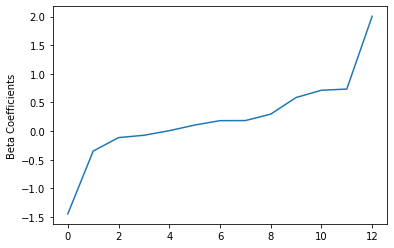

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

beta=np.sort(lrModel.coefficients)

plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

**Receiver-operating characteristic and areaUnderROC**

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


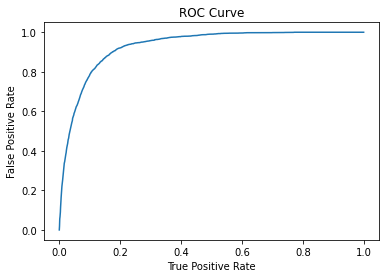

Training set areaUnderROC:0.9294813171035279


In [ ]:
trainingSummary=lrModel.summary


roc=trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set areaUnderROC:'+ str(trainingSummary.areaUnderROC))

**Precision and recall**

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


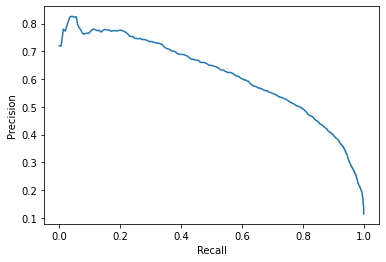

In [ ]:
pr=trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

**Making predictions on the test set**

In [ ]:
predictions=lrModel.transform(test)
predictions.select('job',
 'marital',
 'education',
 'default',
 'housing',
 'loan','y','rawPrediction','prediction','probability').show(30)

+----+-------+---------+-------+-------+----+---+--------------------+----------+--------------------+
| job|marital|education|default|housing|loan|  y|       rawPrediction|prediction|         probability|
+----+-------+---------+-------+-------+----+---+--------------------+----------+--------------------+
| 669|      0|      231|     -1|      0|   0|  0|[7.34854810780571...|       0.0|[0.99935688784659...|
| 669|      0|      982|      0|      1|   0|  0|[5.24631510796942...|       0.0|[0.99476070418965...|
| 395|      2|      945|      0|      1|   0|  0|[3.38275246987198...|       0.0|[0.96716113744104...|
| 657|      2|     1507|     -1|      0|   0|  0|[4.04785131457518...|       0.0|[0.98283976504087...|
|  35|      0|     1507|     -1|     -1|  -1|  0|[3.25866154659760...|       0.0|[0.96298310889019...|
|  35|      0|      982|     -1|      1|   0|  0|[3.42051120047193...|       0.0|[0.96833944784040...|
|1538|      0|     1507|      0|      1|   0|  0|[2.25272648687619...|   

**Evaluating Logistic Regression model**

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator=BinaryClassificationEvaluator(labelCol='y')
print('Test Area Under ROC',evaluator.evaluate(predictions))

Test Area Under ROC 0.9245813630415245


***Using Random Forest Classifier***

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf=RandomForestClassifier(featuresCol='scaled',labelCol='y')
rfModel=rf.fit(train)
predictions=rfModel.transform(test)
predictions.select('job',
 'marital',
 'education',
 'default',
 'housing',
 'loan','y','rawPrediction','prediction','probability').show(10)

+----+-------+---------+-------+-------+----+---+--------------------+----------+--------------------+
| job|marital|education|default|housing|loan|  y|       rawPrediction|prediction|         probability|
+----+-------+---------+-------+-------+----+---+--------------------+----------+--------------------+
| 669|      0|      231|     -1|      0|   0|  0|[19.4467499791760...|       0.0|[0.97233749895880...|
| 669|      0|      982|      0|      1|   0|  0|[19.4467499791760...|       0.0|[0.97233749895880...|
| 395|      2|      945|      0|      1|   0|  0|[19.4467499791760...|       0.0|[0.97233749895880...|
| 657|      2|     1507|     -1|      0|   0|  0|[19.4467499791760...|       0.0|[0.97233749895880...|
|  35|      0|     1507|     -1|     -1|  -1|  0|[19.4467499791760...|       0.0|[0.97233749895880...|
|  35|      0|      982|     -1|      1|   0|  0|[19.4467499791760...|       0.0|[0.97233749895880...|
|1538|      0|     1507|      0|      1|   0|  0|[15.1418177572220...|   

**Evaluating Random Forest Classifier**

In [ ]:
evaluator=BinaryClassificationEvaluator(labelCol='y')
print('Test Area Under ROC:'+str(evaluator.evaluate(predictions,{evaluator.metricName:"areaUnderROC"})))

Test Area Under ROC:0.9296147781228569
